<a href="https://colab.research.google.com/github/Aya-Ai-2022/Image_processing/blob/main/Apply_confusion_matrix_Mnist_Image_Assignment_5_20180104_20180080_20180354.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Loading the Dataset

In [ ]:

# save the final model to file
from tensorflow.keras.datasets import mnist
from tensorflow.keras.utils import to_categorical
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Conv2D
from tensorflow.keras.layers import MaxPooling2D
from tensorflow.keras.layers import Dense
from tensorflow.keras.layers import Flatten
from tensorflow.keras.optimizers import SGD
import tensorflow as tf
from tensorflow import keras
import matplotlib.pyplot as plt
%matplotlib inline
import numpy as np

In [ ]:

# load train and test dataset
def load_dataset():
	# load dataset
	(trainX, trainY), (testX, testY) = mnist.load_data()
	# reshape dataset to have a single channel
	trainX = trainX.reshape((trainX.shape[0], 28, 28, 1))
	testX = testX.reshape((testX.shape[0], 28, 28, 1))
	# one hot encode target values
	trainY = to_categorical(trainY)
	testY = to_categorical(testY)
	return trainX, trainY, testX, testY


In [ ]:
# load dataset
trainX, trainY, testX, testY = load_dataset()

# Processing the Dataset

In [ ]:

# scale pixels
def prep_pixels(train, test):
	# convert from integers to floats
	train_norm = train.astype('float32')
	test_norm = test.astype('float32')
	# normalize to range 0-1
	train_norm = train_norm / 255.0
	test_norm = test_norm / 255.0
	# return normalized images
	return train_norm, test_norm


In [ ]:
# prepare pixel data
trainX, testX = prep_pixels(trainX, testX)

# Creating a CNN

In [ ]:

# define cnn model
def define_model():
	model = Sequential()
	model.add(Conv2D(32, (3, 3), activation='relu', kernel_initializer='he_uniform', input_shape=(28, 28, 1)))
	model.add(MaxPooling2D((2, 2)))
	model.add(Conv2D(64, (3, 3), activation='relu', kernel_initializer='he_uniform'))
	model.add(Conv2D(64, (3, 3), activation='relu', kernel_initializer='he_uniform'))
	model.add(MaxPooling2D((2, 2)))
	model.add(Flatten())
	model.add(Dense(100, activation='relu', kernel_initializer='he_uniform'))
	model.add(Dense(10, activation='softmax'))
	# compile model
	opt = SGD(learning_rate=0.01, momentum=0.9)
	model.compile(optimizer=opt, loss='categorical_crossentropy', metrics=['accuracy'])
	return model


In [ ]:
# define model
model = define_model()

# Training a CNN

In [ ]:



# fit model
history = model.fit(trainX, trainY, epochs=10, batch_size=32)


Epoch 1/10
1875/1875 [==============================] - 94s 49ms/step - loss: 0.1225 - accuracy: 0.9618
Epoch 2/10
1875/1875 [==============================] - 86s 46ms/step - loss: 0.0437 - accuracy: 0.9859
Epoch 3/10
1875/1875 [==============================] - 86s 46ms/step - loss: 0.0300 - accuracy: 0.9905
Epoch 4/10
1875/1875 [==============================] - 84s 45ms/step - loss: 0.0206 - accuracy: 0.9936
Epoch 5/10
1875/1875 [==============================] - 83s 44ms/step - loss: 0.0162 - accuracy: 0.9948
Epoch 6/10
1875/1875 [==============================] - 83s 44ms/step - loss: 0.0118 - accuracy: 0.9959
Epoch 7/10
1875/1875 [==============================] - 85s 45ms/step - loss: 0.0083 - accuracy: 0.9974
Epoch 8/10
1875/1875 [==============================] - 84s 45ms/step - loss: 0.0060 - accuracy: 0.9981
Epoch 9/10
1875/1875 [==============================] - 84s 45ms/step - loss: 0.0043 - accuracy: 0.9987
Epoch 10/10
1875/1875 [==============================] - 85s 45m

In [ ]:
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d (Conv2D)             (None, 26, 26, 32)        320       
                                                                 
 max_pooling2d (MaxPooling2D  (None, 13, 13, 32)       0         
 )                                                               
                                                                 
 conv2d_1 (Conv2D)           (None, 11, 11, 64)        18496     
                                                                 
 conv2d_2 (Conv2D)           (None, 9, 9, 64)          36928     
                                                                 
 max_pooling2d_1 (MaxPooling  (None, 4, 4, 64)         0         
 2D)                                                             
                                                                 
 flatten (Flatten)           (None, 1024)              0

# Predict Model

In [ ]:
predict_value = model.predict(testX)

In [ ]:
predict_value.shape

(10000, 10)

In [ ]:
testY.shape

(10000, 10)

In [ ]:
y_predicted_labels = [np.argmax(i) for i in predict_value]

In [ ]:
print(y_predicted_labels)

[7, 2, 1, 0, 4, 1, 4, 9, 5, 9, 0, 6, 9, 0, 1, 5, 9, 7, 3, 4, 9, 6, 6, 5, 4, 0, 7, 4, 0, 1, 3, 1, 3, 4, 7, 2, 7, 1, 2, 1, 1, 7, 4, 2, 3, 5, 1, 2, 4, 4, 6, 3, 5, 5, 6, 0, 4, 1, 9, 5, 7, 8, 9, 3, 7, 4, 6, 4, 3, 0, 7, 0, 2, 9, 1, 7, 3, 2, 9, 7, 7, 6, 2, 7, 8, 4, 7, 3, 6, 1, 3, 6, 9, 3, 1, 4, 1, 7, 6, 9, 6, 0, 5, 4, 9, 9, 2, 1, 9, 4, 8, 7, 3, 9, 7, 4, 4, 4, 9, 2, 5, 4, 7, 6, 7, 9, 0, 5, 8, 5, 6, 6, 5, 7, 8, 1, 0, 1, 6, 4, 6, 7, 3, 1, 7, 1, 8, 2, 0, 2, 9, 9, 5, 5, 1, 5, 6, 0, 3, 4, 4, 6, 5, 4, 6, 5, 4, 5, 1, 4, 4, 7, 2, 3, 2, 7, 1, 8, 1, 8, 1, 8, 5, 0, 8, 9, 2, 5, 0, 1, 1, 1, 0, 9, 0, 3, 1, 6, 4, 2, 3, 6, 1, 1, 1, 3, 9, 5, 2, 9, 4, 5, 9, 3, 9, 0, 3, 6, 5, 5, 7, 2, 2, 7, 1, 2, 8, 4, 1, 7, 3, 3, 8, 8, 7, 9, 2, 2, 4, 1, 5, 9, 8, 7, 2, 3, 0, 4, 4, 2, 4, 1, 9, 5, 7, 7, 2, 8, 2, 6, 8, 5, 7, 7, 9, 1, 8, 1, 8, 0, 3, 0, 1, 9, 9, 4, 1, 8, 2, 1, 2, 9, 7, 5, 9, 2, 6, 4, 1, 5, 8, 2, 9, 2, 0, 4, 0, 0, 2, 8, 4, 7, 1, 2, 4, 0, 2, 7, 4, 3, 3, 0, 0, 3, 1, 9, 6, 5, 2, 5, 9, 7, 9, 3, 0, 4, 2, 0, 7, 1, 1, 2, 1, 

In [ ]:
y_test_labels = [np.argmax(i) for i in testY]

In [ ]:
print(y_test_labels)

[7, 2, 1, 0, 4, 1, 4, 9, 5, 9, 0, 6, 9, 0, 1, 5, 9, 7, 3, 4, 9, 6, 6, 5, 4, 0, 7, 4, 0, 1, 3, 1, 3, 4, 7, 2, 7, 1, 2, 1, 1, 7, 4, 2, 3, 5, 1, 2, 4, 4, 6, 3, 5, 5, 6, 0, 4, 1, 9, 5, 7, 8, 9, 3, 7, 4, 6, 4, 3, 0, 7, 0, 2, 9, 1, 7, 3, 2, 9, 7, 7, 6, 2, 7, 8, 4, 7, 3, 6, 1, 3, 6, 9, 3, 1, 4, 1, 7, 6, 9, 6, 0, 5, 4, 9, 9, 2, 1, 9, 4, 8, 7, 3, 9, 7, 4, 4, 4, 9, 2, 5, 4, 7, 6, 7, 9, 0, 5, 8, 5, 6, 6, 5, 7, 8, 1, 0, 1, 6, 4, 6, 7, 3, 1, 7, 1, 8, 2, 0, 2, 9, 9, 5, 5, 1, 5, 6, 0, 3, 4, 4, 6, 5, 4, 6, 5, 4, 5, 1, 4, 4, 7, 2, 3, 2, 7, 1, 8, 1, 8, 1, 8, 5, 0, 8, 9, 2, 5, 0, 1, 1, 1, 0, 9, 0, 3, 1, 6, 4, 2, 3, 6, 1, 1, 1, 3, 9, 5, 2, 9, 4, 5, 9, 3, 9, 0, 3, 6, 5, 5, 7, 2, 2, 7, 1, 2, 8, 4, 1, 7, 3, 3, 8, 8, 7, 9, 2, 2, 4, 1, 5, 9, 8, 7, 2, 3, 0, 4, 4, 2, 4, 1, 9, 5, 7, 7, 2, 8, 2, 6, 8, 5, 7, 7, 9, 1, 8, 1, 8, 0, 3, 0, 1, 9, 9, 4, 1, 8, 2, 1, 2, 9, 7, 5, 9, 2, 6, 4, 1, 5, 8, 2, 9, 2, 0, 4, 0, 0, 2, 8, 4, 7, 1, 2, 4, 0, 2, 7, 4, 3, 3, 0, 0, 3, 1, 9, 6, 5, 2, 5, 9, 2, 9, 3, 0, 4, 2, 0, 7, 1, 1, 2, 1, 

In [ ]:
# # # save model
# # model.save('final_model.h5')
# # evaluate model on test dataset
# _, acc = model.evaluate(testX, testY)


In [ ]:
# print(' %.3f' % (acc * 100.0), '%')

# Confusion Matrix

In [ ]:
arr_2d = np.zeros( (4, 5) , dtype=np.int64)

In [ ]:
arr_2d

array([[0, 0, 0, 0, 0],
       [0, 0, 0, 0, 0],
       [0, 0, 0, 0, 0],
       [0, 0, 0, 0, 0]])

In [ ]:
def confusion_matrix_fun (y_test_labels , y_predicted_labels):
  CM = np.zeros( (10, 10) , dtype=np.int64)
  for i in range(len(y_predicted_labels)):
    CM[y_predicted_labels[i]][y_test_labels[i]] = CM[y_predicted_labels[i]][y_test_labels[i]] + 1
  return CM

In [ ]:
CM = confusion_matrix_fun (y_test_labels , y_predicted_labels)
CM

array([[ 977,    0,    0,    0,    0,    0,    2,    0,    1,    0],
       [   1, 1132,    0,    0,    0,    0,    2,    2,    0,    1],
       [   0,    0, 1022,    1,    0,    0,    0,    1,    1,    0],
       [   0,    2,    1, 1005,    0,    6,    0,    1,    1,    1],
       [   0,    0,    1,    0,  979,    0,    2,    0,    1,    8],
       [   0,    0,    0,    2,    0,  883,    5,    0,    1,    2],
       [   0,    0,    0,    0,    1,    1,  946,    0,    0,    0],
       [   2,    1,    7,    1,    0,    1,    0, 1024,    2,    3],
       [   0,    0,    1,    1,    0,    0,    1,    0,  964,    1],
       [   0,    0,    0,    0,    2,    1,    0,    0,    3,  993]])

Text(69.0, 0.5, 'Truth')

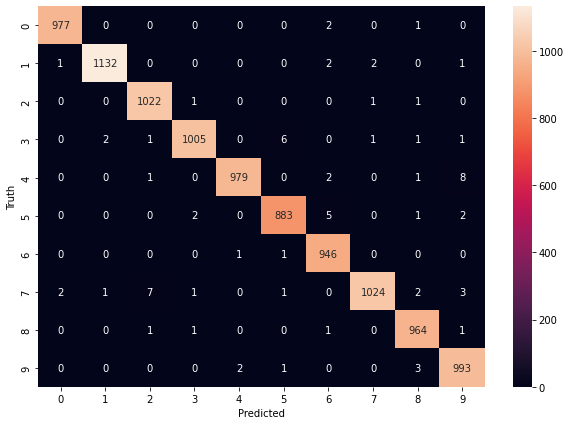

In [ ]:

import seaborn as sn
plt.figure(figsize = (10,7))
sn.heatmap(CM, annot=True, fmt='d')
plt.xlabel('Predicted')
plt.ylabel('Truth')

In [ ]:
# Look at confusion matrix 
from sklearn.metrics import confusion_matrix
import itertools

def plot_confusion_matrix(cm, classes,
                          normalize=False,
                          title='Confusion matrix',
                          cmap=plt.cm.Blues):
    """
    This function prints and plots the confusion matrix.
    Normalization can be applied by setting `normalize=True`.
    """
    plt.imshow(cm, interpolation='nearest', cmap=cmap)
    plt.title(title)
    plt.colorbar()
    tick_marks = np.arange(len(classes))
    plt.xticks(tick_marks, classes, rotation=45)
    plt.yticks(tick_marks, classes)

    if normalize:
        cm = cm.astype('float') / cm.sum(axis=1)[:, np.newaxis]

    thresh = cm.max() / 2.
    for i, j in itertools.product(range(cm.shape[0]), range(cm.shape[1])):
        plt.text(j, i, cm[i, j],
                 horizontalalignment="center",
                 color="white" if cm[i, j] > thresh else "black")

    plt.tight_layout()
    plt.ylabel('True label')
    plt.xlabel('Predicted label')



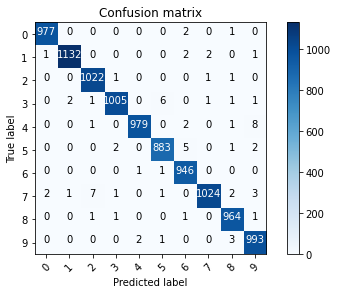

In [ ]:
# plot the confusion matrix
plot_confusion_matrix(CM, classes = range(10)) 

#  Precision, Recall, F1 score , Accuracy

In [ ]:
def precision(label, confusion_matrix):
    col = confusion_matrix[:, label]
    return confusion_matrix[label, label] / col.sum()
    
def recall(label, confusion_matrix):
    row = confusion_matrix[label, :]
    return confusion_matrix[label, label] / row.sum()

def precision_macro_average(confusion_matrix):
    rows, columns = confusion_matrix.shape
    sum_of_precisions = 0
    for label in range(rows):
        sum_of_precisions += precision(label, confusion_matrix)
    return sum_of_precisions / rows

def recall_macro_average(confusion_matrix):
    rows, columns = confusion_matrix.shape
    sum_of_recalls = 0
    for label in range(columns):
        sum_of_recalls += recall(label, confusion_matrix)
    return sum_of_recalls / columns

In [ ]:
print("Label Precision Recall F1_score")
for label in range(10):
  Precision = precision(label, CM)
  Recall = recall(label, CM)
  F1_score = 2*(Precision * Recall) / (Precision + Recall)
  print(f"{label:5d} {precision(label, CM):9.3f} {recall(label, CM):6.3f} {F1_score:6.3f}")

Label Precision Recall F1_score
    0     0.997  0.997  0.997
    1     0.997  0.995  0.996
    2     0.990  0.997  0.994
    3     0.995  0.988  0.992
    4     0.997  0.988  0.992
    5     0.990  0.989  0.989
    6     0.987  0.998  0.993
    7     0.996  0.984  0.990
    8     0.990  0.996  0.993
    9     0.984  0.994  0.989


In [ ]:
Precision_total = precision_macro_average(CM)
Recall_total = recall_macro_average(CM)
F1_score_total = 2*(Precision_total * Recall_total) / (Precision_total + Recall_total)

In [ ]:
print("Precision Total :", Precision_total*100, '%')

print("Recall Total :", Recall_total*100, '%')

print("F1_Score Total :", F1_score_total*100, '%')

Precision Total : 99.2396913874971 %
Recall Total : 99.25054545824159 %
F1_Score Total : 99.24511812610197 %


In [ ]:
def accuracy(confusion_matrix):
    diagonal_sum = confusion_matrix.trace()
    sum_of_all_elements = confusion_matrix.sum()
    return diagonal_sum / sum_of_all_elements 

In [ ]:
accuracy_ = accuracy(CM)*100

In [ ]:
print("Accuracy :" , accuracy_ , '%')

Accuracy : 99.25 %
